In [1]:
%pylab inline
import pandas as pd
import numpy as np
import itertools
import model
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
# generate points for fig 2b inset graph

from model import *
network = 'random'
n_agents = 60
deg = 3
n_beliefs = 25
n_concepts = 25
pathlength = 2
threshold = 1.1
clustering = 'average'
randomization = 'shuffle'

adopt_func = fast_adopt
susceptible_func = fast_susceptible

args = (network, n_agents, deg, n_beliefs, n_concepts, pathlength, threshold, clustering, randomization)
g, beliefs = setup(*args[:5])

g1 = copy.deepcopy(g)

# interdependent
inter_sus = pd.Series(measure_susceptibility(g1, beliefs, susceptible_func)) / n_agents * 100
seed = pd.Series(measure_diffusion(g1, beliefs)) / n_agents * 100
simulate_simultaneous(g1, beliefs, n_steps=10, adopt=adopt_func)
inter_diff = pd.Series(measure_diffusion(g1, beliefs)) / n_agents * 100
inter_final_suscep = np.mean(list(measure_susceptibility(g1, beliefs, susceptible_func).values())) / n_agents * 100



# independent (match)
for step, g2, s2 in simulate_independent_match_susceptibility(copy.deepcopy(g),
                                                              sus_target=inter_final_suscep / 100,
                                                              n_steps=10,
                                                              n_concepts=n_concepts,
                                                              beliefs=beliefs):

    pass
indep_suscep = pd.Series(s2) / n_agents * 100
indep_diff = pd.Series(measure_diffusion(g2, beliefs)) / n_agents * 100


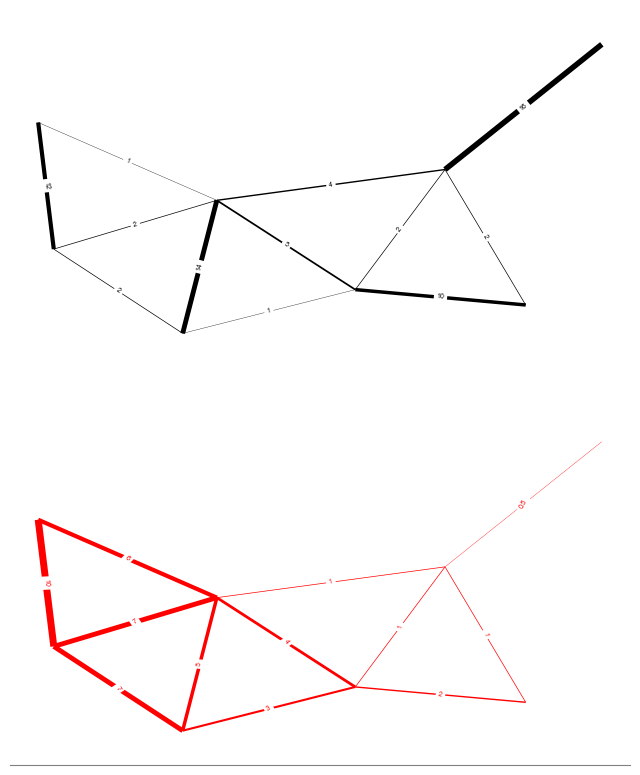

In [10]:
# generate network for fig 2C,D inset graphs

#fig = plt.figure(figsize=(1.2,1.5))

inter = {(0,1):10, (1,2):7, (2,3):4, (3,4):2, (4,5):1, 
         (0,2):6, (3,5):1, (2,6):5, (1,6):7, (5,2):1,(5,7):0.5, (3,6):3}
G = nx.from_edgelist(inter)
nx.set_edge_attributes(G, inter, name='weight')

#pos = nx.spring_layout(G, weight=None)
pos = {
    0: [ 0.05337489, -1.        ],
    1: [-0.38712707, -0.80563193],
    2: [-0.03981886, -0.30618229],
    3: [-0.21645782,  0.26372263],
    4: [-0.09271407,  0.85974724],
    5: [0.31097159, 0.43462805],
    6: [-0.55557835, -0.27382355],
    7: [0.92734968, 0.82753985]
}
def rotate(x, rotation=0):
    length = sqrt(x[0]**2 + x[1]**2)
    angle = np.arctan2(x[0], x[1])
    new_angle = angle+rotation
    return [length*cos(new_angle), length*sin(new_angle)]

pos = {k: rotate(v, -.3) for k, v in pos.items()}

edges = G.edges()
weights = [G[u][v]['weight']/2 for u,v in edges]

nx.draw_networkx
nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=weights, node_size=0, with_labels=False)
nx.draw_networkx_edge_labels(G, pos, edge_labels=inter, font_size=5, alpha=1, font_color='r')

indep = {(0,1):12, (1,2):2, (2,3):5, (3,4):10, (4,5):2, 
         (0,2):1, (3,5):2, (2,6):14, (1,6):2, (2,5):4, (5,7):16, (3,6):1}
G2 = nx.from_edgelist(indep)
nx.set_edge_attributes(G2, indep, name='weight')

dx = 0
dy = 1.5 
pos2 = {k:[v[0]+dx, v[1]+dy] for k,v in pos.items()}
plt.box('off')

weights2 = [G2[u][v]['weight']/4 for u,v in G2.edges()]

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=weights2, node_size=0, with_labels=False)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=indep, font_size=5, alpha=1);


In [6]:
# load precomputed simulation results
files = glob.glob('data/main_article_df_*.pickle') 
dfs = itertools.chain.from_iterable([pd.read_pickle(f) for f in files])
df = pd.concat(dfs)
df.shape

(168000, 26)

In [7]:
means = df.groupby(level=0).aggregate('mean')
# have to cast as type 'float64', because for some reason some of the columns are type 'object'.
means['NF susceptibility'] = means['inter susceptibles'].loc[0]
means['inter percent explained variance'] = means['inter pca1 explained variance']/means['inter pca total variance'] * 100
means['match percent explained variance'] = means['match pca1 explained variance']/means['match pca total variance'] * 100
means['inter eccentricity'] = means['inter pca1 explained variance']/means['inter pca2 explained variance']
means['match eccentricity'] = means['match pca1 explained variance']/means['match pca2 explained variance']
means = means.loc[:9]
means.T

,0,1,2,3,4,5,6,7,8,9
inter best connected belief corr,-0.011339,0.135734,0.307291,0.414336,0.477915,0.510033,0.523733,0.528838,0.530661,0.531278
inter susceptibles,21.701948,36.913447,54.727019,63.739998,66.460983,67.204750,67.416306,67.480479,67.500921,67.508353
inter adopters,8.378954,14.682261,28.502624,44.954324,54.023134,57.296884,58.356907,58.708683,58.829501,58.872095
inter net initial suscep correlation,NaN,0.275353,0.218654,0.199642,0.204812,0.214609,0.220708,0.223650,0.224829,0.225272
inter top decile semantic clustering,0.072581,0.133476,0.231561,0.345554,0.434677,0.468194,0.478957,0.482346,0.481464,0.482319
inter top decile semantic modularity,0.474643,0.422304,0.333921,0.263131,0.222890,0.208592,0.204709,0.204148,0.204043,0.203891
inter correlation similarity 95%,0.088647,0.162159,0.258018,0.312406,0.331758,0.337646,0.339111,0.339421,0.339528,0.339557
inter correlation similarity 5%,-0.091452,-0.089178,-0.094963,-0.115019,-0.143832,-0.161009,-0.168513,-0.171489,-0.172598,-0.172997
inter pca1 explained variance,0.774695,2.141502,7.488508,10.245113,9.137874,8.419366,8.214540,8.163262,8.150246,8.145925
inter pca2 explained variance,0.738585,1.794558,3.885944,4.992357,5.355010,5.504863,5.568652,5.593726,5.603430,5.606967


In [8]:

plt.rcParams.update({
    "figure.dpi": 100,
    "figure.figsize": (8, 10),
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 2,
    "lines.marker": "o",
    "lines.markersize": 5,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 8,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 8,
    "xtick.major.size": 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 8,
    
    "text.color": "grey",
    "text.usetex": False
})


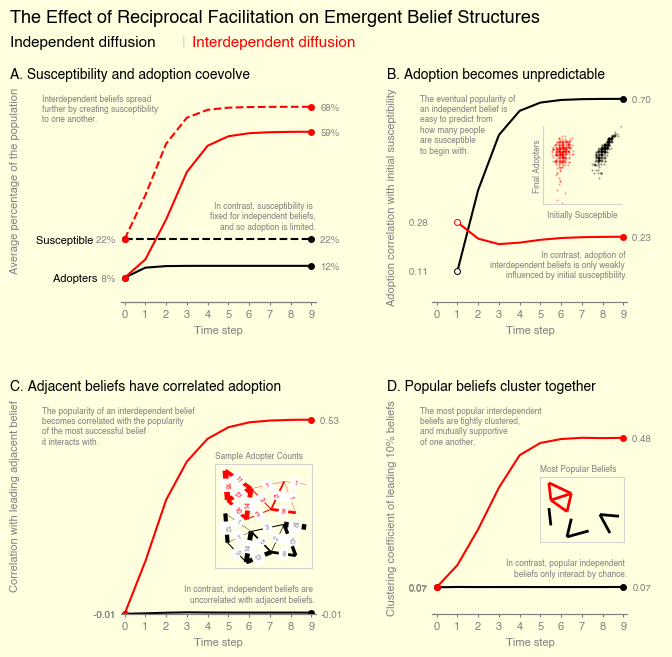

In [57]:
fig = plt.figure(figsize=(6.5, 6.5), facecolor='lightyellow')
# sociological science:
# 8 pt font in tables
# 10 pt font in text
# 1 inch margins

x1, x2 = 0, .58
y1, y2 = .91, .43
textdx, textdy = .03, .04

ytick_fontdict={'fontsize':7}

####### upper left ##########
ax1 = plt.subplot(2, 2, 1)

means['NF diffusion'].plot(ax=ax1, color='k', markevery=9)
means['NF susceptibility'].plot(ax=ax1, color='k', linestyle='--', markevery=9)
means['inter adopters'].plot(ax=ax1, color='r', markevery=9)
means['inter susceptibles'].plot(ax=ax1, color='r', linestyle='--', markevery=9)

ax1.set_xlim(-.2, 9.2)
ylim = (0, 72)
ax1.set_ylim(*ylim)

# bottom
ax1.set_xlabel('Time step')
ax1.set_xticks(range(0,10,1))
ax1.set_xticklabels(range(0,10,1))


# left
ax1.set_yticks([means['NF susceptibility'].iloc[0], 
               means['NF diffusion'].iloc[0]])
ax1.set_yticklabels(
           [('%.0f%%' % means['NF susceptibility'].iloc[0]).rjust(7), 
            ('%.0f%%' % means['NF diffusion'].iloc[0]).rjust(8)], fontdict=ytick_fontdict)

# lefter left
ax1L = ax1.twinx()
ax1L.set_ylim(*ylim)
ax1L.yaxis.set_label_position('left')
ax1L.yaxis.set_ticks_position('left')
ax1L.tick_params(axis='y', labelcolor="k")
ax1L.set_yticks([means['NF susceptibility'].iloc[0], 
                 means['NF diffusion'].iloc[0]])
ax1L.set_yticklabels(['Susceptible       ', 
                        'Adopters      '])

# right
ax1R = ax1.twinx()
ax1R.set_ylim(*ylim)
ax1R.yaxis.set_label_position("right")
ax1R.set_yticks([means['NF susceptibility'].iloc[-1], 
                means['NF diffusion'].iloc[-1],
                means['inter susceptibles'].iloc[-1], 
                means['inter adopters'].iloc[-1]
               ])
ax1R.set_yticklabels([('%.0f%%' % means['NF susceptibility'].iloc[-1]).ljust(8), 
                      '%.0f%%' % means['NF diffusion'].iloc[-1],
                      '%.0f%%' % means['inter susceptibles'].iloc[-1], 
                      '%.0f%%' % means['inter adopters'].iloc[-1]
                     ], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y1-0.03, s='Average percentage of the population', rotation=90, va='top')
plt.figtext(x=x1, y=y1, s='A. Susceptibility and adoption coevolve', va='top', color='k', size=10)
plt.figtext(x=x1+textdx, y=y1-textdy, s='Interdependent beliefs spread\nfurther by creating susceptibility\nto one another.', va='top', size=6)
plt.figtext(x=.47, y=.705, va='top', size=6, ha='right',
            s='In contrast, susceptibility is \nfixed for independent beliefs,\nand so adoption is limited.')


######### Upper Right ########
ax2 = plt.subplot(2, 2, 2)
means['match net initial suscep correlation'].plot(ax=ax2, color='k', markevery=(1,8))
means['inter net initial suscep correlation'].plot(ax=ax2, color='r', markevery=(1,8))

ax2.plot([1,1], 
         [means['match net initial suscep correlation'].loc[1], 
          means['inter net initial suscep correlation'].loc[1]], 
         color='white', markersize=2.5, zorder=20, linewidth=0)

ax2.set_xlim(-.2, 9.2)
ylim = (0, .72)
ax2.set_ylim(*ylim)

# bottom
ax2.set_xlabel('Time step')
ax2.set_xticks(range(0,10,1))
ax2.set_xticklabels(range(0,10,1))

# left
ax2.set_yticks([means['inter net initial suscep correlation'].iloc[1], 
                means['match net initial suscep correlation'].iloc[1]])
ax2.set_yticklabels(
    [('%.02f' % means['inter net initial suscep correlation'].iloc[1]).rjust(8), 
     ('%.02f' % means['match net initial suscep correlation'].iloc[1]).rjust(8)], fontdict=ytick_fontdict
)

# right
ax2R = ax2.twinx()
ax2R.set_ylim(*ylim)
ax2R.yaxis.set_label_position("right")

ax2R.set_yticks([means['inter net initial suscep correlation'].iloc[-1], 
                means['match net initial suscep correlation'].iloc[-1]])
ax2R.set_yticklabels([('%.02f' % means['inter net initial suscep correlation'].iloc[-1]).ljust(8), 
                     ('%.02f' % means['match net initial suscep correlation'].iloc[-1]).ljust(8)], 
                     fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y1-0.03, s='Adoption correlation with initial susceptibility', rotation=90, va='top')
plt.figtext(x=x2, y=y1, s='B. Adoption becomes unpredictable', va='top', color='k', size=10)
plt.figtext(x=x2+textdx, y=y1-textdy, s='The eventual popularity of\nan independent belief is\neasy to predict from \nhow many people\nare susceptible\nto begin with.', va='top', size=6)
plt.figtext(x=.95, y=.63, s='In contrast, adoption of \ninterdependent beliefs is only weakly \ninfluenced by initial susceptibility.', 
            va='top', size=6, ha='right')

#### inset graph
ax2b = fig.add_axes([.82,.7, .12, .12])
ax2b.plot(inter_sus[seed.index], inter_diff[seed.index], 'r.', markersize=1, alpha=.4)
ax2b.plot(indep_suscep[seed.index], indep_diff[seed.index], 'k.', markersize=1, alpha=.4)
plt.ylim(0, max(max(indep_diff), max(inter_diff)))
plt.xlim(0, max(max(inter_sus), max(indep_suscep)))
ax2b.spines['left'].set_visible(True)
ax2b.spines['left'].set_color('lightgrey')
ax2b.spines['bottom'].set_color('lightgrey')
ax2b.set_xticks([])
ax2b.set_yticks([])
ax2b.set_xlabel('Initially Susceptible', fontsize=6)
ax2b.set_ylabel('Final Adopters', fontsize=6, va='center')



# ######## Lower Left ############
ax3 = plt.subplot(2, 2, 3)
ax3.plot(means.index, means['match best connected belief corr'], color='k', markevery=(0,9))
ax3.plot(means.index, means['inter best connected belief corr'], color='r', markevery=(0,9))

ax3.set_xlim(-.2, 9.2)
ylim = (0, .57)
ax3.set_ylim(*ylim)

# bottom
ax3.set_xlabel('Time step')
ax3.set_xticks(range(0,10,1))
ax3.set_xticklabels(range(0,10,1))


# left
ax3.set_yticks([means['inter best connected belief corr'].iloc[0], 
               means['match best connected belief corr'].iloc[0]])
ax3.set_yticklabels(
           [('%.02f' % means['inter best connected belief corr'].iloc[0]).rjust(7), 
            ('%.02f' % means['match best connected belief corr'].iloc[0]).rjust(8)], fontdict=ytick_fontdict)


# right
ax3R = ax3.twinx()
ax3R.set_ylim(*ylim)
ax3R.yaxis.set_label_position("right")
ax3R.set_yticks([means['inter best connected belief corr'].iloc[-1], 
                means['match best connected belief corr'].iloc[-1]])
ax3R.set_yticklabels([('%.02f' % means['inter best connected belief corr'].iloc[-1]).ljust(8), 
                      '%.02f' % means['match best connected belief corr'].iloc[-1]], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y2-.03, s='Correlation with leading adjacent belief', rotation=90, va='top')
plt.figtext(x=x1, y=y2, s='C. Adjacent beliefs have correlated adoption', va='top', color='k', size=10)
plt.figtext(x=x1+textdx, y=y2-textdy, va='top', size=6,
            s="The popularity of an interdependent belief\nbecomes correlated with the popularity\nof the most successful belief\nit interacts with.")
plt.figtext(x=.47, y=.115, va='top', size=6, ha='right',
            s='In contrast, independent beliefs are \nuncorrelated with adjacent beliefs.')


#### Inset ####
ax3b = fig.add_axes([.315,.14, .15, .16])
inter = {(0,1):16, (1,2):13, (2,3):3, (3,4):8, (4,5):1, 
         (0,2):11, (3,5):5, (2,6):14, (1,6):10, (5,2):1,(5,7):1, (3,6):3}
G = nx.from_edgelist(inter)
nx.set_edge_attributes(G, inter, name='weight')

pos = {
    0: [ 0.05337489, -1.        ],
    1: [-0.38712707, -0.80563193],
    2: [-0.03981886, -0.30618229],
    3: [-0.21645782,  0.26372263],
    4: [-0.09271407,  0.85974724],
    5: [0.31097159, 0.43462805],
    6: [-0.55557835, -0.27382355],
    7: [0.42734968, 0.96753985]
}
def rotate(x, rotation=0):
    length = sqrt(x[0]**2 + x[1]**2)
    angle = np.arctan2(x[0], x[1])
    new_angle = angle+rotation
    return [length*cos(new_angle), length*sin(new_angle)]
pos = {k: rotate(v, -.3) for k, v in pos.items()}

edges = G.edges()
weights = [G[u][v]['weight']/4 for u,v in edges]

nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=weights, node_size=0, with_labels=False, ax=ax3b)
nx.draw_networkx_edge_labels(G, pos, edge_labels=inter, font_size=5, alpha=1, font_color='r', ax=ax3b)

indep = {(0,1):12, (1,2):1, (2,3):5, (3,4):8, (4,5):10, 
         (0,2):1, (3,5):2, (2,6):14, (1,6):3, (2,5):3, (5,7):16, (3,6):13}
G2 = nx.from_edgelist(indep)
nx.set_edge_attributes(G2, indep, name='weight')

dx = 0
dy = -.7
pos2 = {k:[v[0]+dx, v[1]+dy] for k,v in pos.items()}

weights2 = [G2[u][v]['weight']/4 for u,v in G2.edges()]

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=weights2, node_size=0, with_labels=False, ax=ax3b)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=indep, font_size=5, alpha=.5, ax=ax3b);

plt.box('on')
ax3b.spines['left'].set_visible(True)
ax3b.spines['left'].set_color('lightgrey')
ax3b.spines['bottom'].set_color('lightgrey')
ax3b.spines['right'].set_visible(True)
ax3b.spines['right'].set_color('lightgrey')
ax3b.spines['top'].set_visible(True)
ax3b.spines['top'].set_color('lightgrey')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.25, 0.45)

plt.figtext(x=.315, y=.32, s='Sample Adopter Counts', va='top', size=6)

###### Lower Right #########
ax4 = plt.subplot(2, 2, 4)
ax4.plot(means.index, means['match top decile semantic clustering'], color='k', markevery=(0,9))
ax4.plot(means.index, means['inter top decile semantic clustering'], color='r', markevery=(0,9))



ax4.set_xlim(-.2, 9.2)
ylim = (0, .57)
ax4.set_ylim(*ylim)

# bottom
ax4.set_xlabel('Time step')
ax4.set_xticks(range(0,10,1))
ax4.set_xticklabels(range(0,10,1))

# left
ax4.set_yticks([means['inter top decile semantic clustering'].iloc[0], 
                means['match top decile semantic clustering'].iloc[0]])
ax4.set_yticklabels([('%.02f' % means['inter top decile semantic clustering'].iloc[0]), 
                     ('%.02f' % means['match top decile semantic clustering'].iloc[0])], fontdict=ytick_fontdict)


# right
ax4R = ax4.twinx()
ax4R.set_ylim(*ylim)
ax4R.yaxis.set_label_position("right")
ax4R.set_yticks([means['inter top decile semantic clustering'].iloc[-1], 
                means['match top decile semantic clustering'].iloc[-1]])
ax4R.set_yticklabels([('%.02f' % means['inter top decile semantic clustering'].iloc[-1]).ljust(8), 
                     '%.02f' % means['match top decile semantic clustering'].iloc[-1]], fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y2-.03, s='Clustering coefficient of leading 10% beliefs', rotation=90, va='top')
plt.figtext(x=x2, y=y2, s='D. Popular beliefs cluster together', va='top', color='k', size=10)
plt.figtext(x=x2+textdx, y=y2-textdy, s='The most popular interdependent\nbeliefs are tightly clustered,\nand mutually supportive\nof one another.', va='top', size=6)
plt.figtext(x=.95, y=.155, s='In contrast, popular independent \nbeliefs only interact by chance.', 
            va='top', ha='right', size=6)


#### Inset ####
ax4b = fig.add_axes([.815, .18, .13, .1])

nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=[2 if v>2 else 0 for v in weights], 
                 node_size=0, with_labels=False, ax=ax4b)

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=[2 if v>2 else 0 for v in weights2], 
                 node_size=0, with_labels=False, ax=ax4b)
plt.box('on')
ax4b.spines['left'].set_visible(True)
ax4b.spines['left'].set_color('lightgrey')
ax4b.spines['bottom'].set_color('lightgrey')
ax4b.spines['right'].set_visible(True)
ax4b.spines['right'].set_color('lightgrey')
ax4b.spines['top'].set_visible(True)
ax4b.spines['top'].set_color('lightgrey')
plt.figtext(x=.815, y=.3, s='Most Popular Beliefs', va='top', size=6)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.3, .5)



#### Figure Title text ###
plt.suptitle('The Effect of Reciprocal Facilitation on Emergent Belief Structures', 
             x=0, y=1, ha='left', va='top', fontsize=13, color='k')
plt.figtext(x=0, y=.96, s='Independent diffusion',  ha='left', va='top', fontsize=11, color='k')
plt.figtext(x=.265, y=.96, s='|',  ha='left', va='top', fontsize=11, color='lightgrey')
plt.figtext(x=.28, y=.96, s='Interdependent diffusion', va='top', ha='left', fontsize=11, color='r')

plt.subplots_adjust(left=.17, right=.95, top=.87, bottom=.07, wspace=.6, hspace=.5)

plt.savefig('Fig2_emergent_belief_structures', transparent=False, dpi=150)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


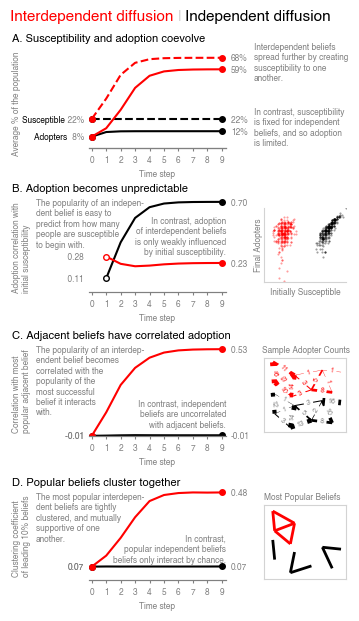

In [127]:
plt.rcParams.update({
    "figure.dpi": 100,
    "figure.figsize": (8, 10),
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 1.5,
    "lines.marker": "o",
    "lines.markersize": 4,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 8,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 8,
    "xtick.major.size": 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 8,
    
    "text.color": "grey",
    "text.usetex": False
})

figsize=(3.43, 6)
fig = plt.figure(figsize=figsize)

left = .23
right = .63
top = .93
bottom = .05

ylabel_size=6
#ytick_size=6
xtick_size=6
xlabel_size=6
subtitle_size=8
ytick_fontdict={'fontsize':6}

inset_x = .24
inset_y = .9*inset_x*figsize[0]/figsize[1]
inset_dy = .04  # vertical distance btw y1 title location and top of inset
x1, x2, x3 = .005, .005, .98-inset_x
y1, y2, y3, y4 = .96, .71, .465, .22
textdx, textdy = .07, .025 # distance from the xlabels for comments

####### AAAA ##########
ax1 = plt.subplot(4, 1, 1)

means['NF diffusion'].plot(ax=ax1, color='k', markevery=9)
means['NF susceptibility'].plot(ax=ax1, color='k', linestyle='--', markevery=9)
means['inter adopters'].plot(ax=ax1, color='r', markevery=9)
means['inter susceptibles'].plot(ax=ax1, color='r', linestyle='--', markevery=9)

ax1.set_xlim(-.2, 9.3)
ylim = (0, 72)
ax1.set_ylim(*ylim)

# bottom
ax1.set_xlabel('Time step', fontsize=xlabel_size)
ax1.set_xticks(range(0,10,1))
ax1.set_xticklabels(range(0,10,1), {"fontsize":xtick_size})


# left
ax1.set_yticks([means['NF susceptibility'].iloc[0], 
               means['NF diffusion'].iloc[0]])
ax1.set_yticklabels(
           [('%.0f%%' % means['NF susceptibility'].iloc[0]).rjust(7), 
            ('%.0f%%' % means['NF diffusion'].iloc[0]).rjust(8)], fontdict=ytick_fontdict)

# lefter left
ax1L = ax1.twinx()
ax1L.set_ylim(*ylim)
ax1L.yaxis.set_label_position('left')
ax1L.yaxis.set_ticks_position('left')
ax1L.tick_params(axis='y', labelcolor="k")
ax1L.set_yticks([means['NF susceptibility'].iloc[0], 
                 means['NF diffusion'].iloc[0]])
ax1L.set_yticklabels(['Susceptible        ', 
                        'Adopters       '], fontdict=ytick_fontdict)

# right
ax1R = ax1.twinx()
ax1R.set_ylim(*ylim)
ax1R.yaxis.set_label_position("right")
ax1R.set_yticks([means['NF susceptibility'].iloc[-1], 
                means['NF diffusion'].iloc[-1],
                means['inter susceptibles'].iloc[-1], 
                means['inter adopters'].iloc[-1]
               ])
ax1R.set_yticklabels([('%.0f%%' % means['NF susceptibility'].iloc[-1]).ljust(8), 
                      '%.0f%%' % means['NF diffusion'].iloc[-1],
                      '%.0f%%' % means['inter susceptibles'].iloc[-1], 
                      '%.0f%%' % means['inter adopters'].iloc[-1]
                     ], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y1-0.03, s='Average % of the population', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x1, y=y1, s='A. Susceptibility and adoption coevolve', va='top', color='k', size=subtitle_size)
plt.figtext(x=x3-.03, y=y1-textdy+.01, va='top', size=6,
            s='Interdependent beliefs\n'\
              'spread further by creating\n'\
              'susceptibility to one\n'\
              'another.')
plt.figtext(x=x3-.03, y=y1-inset_y, va='top', size=6, ha='left',
            s='In contrast, susceptibility\n'\
              'is fixed for independent\n'\
              'beliefs, and so adoption\n'\
              'is limited.')


######### BBBB ########
ax2 = plt.subplot(4, 1, 2)
means['match net initial suscep correlation'].plot(ax=ax2, color='k', markevery=(1,8))
means['inter net initial suscep correlation'].plot(ax=ax2, color='r', markevery=(1,8))


ax2.plot([1,1], 
         [means['match net initial suscep correlation'].loc[1], 
          means['inter net initial suscep correlation'].loc[1]], 
         color='white', markersize=2, zorder=20, linewidth=0)  # white center of first point in b

ax2.set_xlim(-.2, 9.3)
ylim = (0, .75)
ax2.set_ylim(*ylim)

# bottom
ax2.set_xlabel('Time step', fontsize=xlabel_size)
ax2.set_xticks(range(0,10,1))
ax2.set_xticklabels(range(0,10,1), fontsize=xtick_size)

# left
ax2.set_yticks([means['inter net initial suscep correlation'].iloc[1], 
                means['match net initial suscep correlation'].iloc[1]])
ax2.set_yticklabels(
    [('%.02f' % means['inter net initial suscep correlation'].iloc[1]).rjust(8), 
     ('%.02f' % means['match net initial suscep correlation'].iloc[1]).rjust(8)], fontdict=ytick_fontdict
)

# right
ax2R = ax2.twinx()
ax2R.set_ylim(*ylim)
ax2R.yaxis.set_label_position("right")

ax2R.set_yticks([means['inter net initial suscep correlation'].iloc[-1], 
                means['match net initial suscep correlation'].iloc[-1]])
ax2R.set_yticklabels([('%.02f' % means['inter net initial suscep correlation'].iloc[-1]).ljust(8), 
                     ('%.02f' % means['match net initial suscep correlation'].iloc[-1]).ljust(8)], 
                     fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y2-0.03, s='Adoption correlation with\ninitial susceptibility', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x2, y=y2, s='B. Adoption becomes unpredictable', va='top', color='k', size=subtitle_size)
plt.figtext(x=x2+textdx, y=y2-textdy, va='top', size=6,
            s='The popularity of an indepen-\n'\
              'dent belief is easy to\n'\
              'predict from how many\n'\
              'people are susceptible\n'\
              'to begin with.')
plt.figtext(x=right, y=y2-textdy-.03, va='top', size=6, ha='right',
            s='In contrast, adoption\n'\
              'of interdependent beliefs\n'\
              'is only weakly influenced\n'\
              'by initial susceptibility.')


#### inset graph
ax2b = fig.add_axes([x3,y2-inset_dy-inset_y, inset_x, inset_y])
ax2b.plot(inter_sus[seed.index], inter_diff[seed.index], 'r.', markersize=1, alpha=.4)
ax2b.plot(indep_suscep[seed.index], indep_diff[seed.index], 'k.', markersize=1, alpha=.4)
plt.ylim(0, max(max(indep_diff), max(inter_diff)))
plt.xlim(0, max(max(inter_sus), max(indep_suscep)))
ax2b.spines['left'].set_visible(True)
ax2b.spines['left'].set_color('lightgrey')
ax2b.spines['bottom'].set_color('lightgrey')
ax2b.set_xticks([])
ax2b.set_yticks([])
ax2b.set_xlabel('Initially Susceptible', fontsize=6)
ax2b.set_ylabel('Final Adopters', fontsize=6, va='center')



# ######## CCCC ############
ax3 = plt.subplot(4, 1, 3)
ax3.plot(means.index, means['match best connected belief corr'], color='k', markevery=(0,9))
ax3.plot(means.index, means['inter best connected belief corr'], color='r', markevery=(0,9))

ax3.set_xlim(-.2, 9.3)
ylim = (0, .59)
ax3.set_ylim(*ylim)

# bottom
ax3.set_xlabel('Time step', fontsize=xlabel_size)
ax3.set_xticks(range(0,10,1))
ax3.set_xticklabels(range(0,10,1), fontsize=xtick_size)


# left
ax3.set_yticks([means['inter best connected belief corr'].iloc[0], 
               means['match best connected belief corr'].iloc[0]])
ax3.set_yticklabels(
           [('%.02f' % means['inter best connected belief corr'].iloc[0]).rjust(7), 
            ('%.02f' % means['match best connected belief corr'].iloc[0]).rjust(8)], fontdict=ytick_fontdict)


# right
ax3R = ax3.twinx()
ax3R.set_ylim(*ylim)
ax3R.yaxis.set_label_position("right")
ax3R.set_yticks([means['inter best connected belief corr'].iloc[-1], 
                means['match best connected belief corr'].iloc[-1]])
ax3R.set_yticklabels([('%.02f' % means['inter best connected belief corr'].iloc[-1]).ljust(8), 
                      '%.02f' % means['match best connected belief corr'].iloc[-1]], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y3-.03, s='Correlation with most\npopular adjacent belief', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x1, y=y3, s='C. Adjacent beliefs have correlated adoption', va='top', color='k', size=subtitle_size)
plt.figtext(x=x1+textdx, y=y3-textdy, va='top', size=6,
            s='The popularity of an interdep-\n'\
              'endent belief becomes\n'\
              'correlated with the\n'\
              'popularity of the \n'\
              'most successful\n'\
              'belief it interacts\n'\
              'with.')
plt.figtext(x=right, y=y3-textdy-.09, va='top', size=6, ha='right',
            s='In contrast, independent\n'\
              'beliefs are uncorrelated\n'\
                'with adjacent beliefs.')


#### Inset ####
ax3b = fig.add_axes([x3, y3-inset_dy-inset_y-.005, inset_x, inset_y])
inter = {(0,1):16, (1,2):13, (2,3):3, (3,4):8, (4,5):1, 
         (0,2):11, (3,5):5, (2,6):14, (1,6):10, (5,2):1,(5,7):1, (3,6):3}
G = nx.from_edgelist(inter)
nx.set_edge_attributes(G, inter, name='weight')

pos = {
    0: [ 0.05337489, -1.        ],
    1: [-0.38712707, -0.80563193],
    2: [-0.03981886, -0.30618229],
    3: [-0.21645782,  0.26372263],
    4: [-0.09271407,  0.85974724],
    5: [0.31097159, 0.43462805],
    6: [-0.55557835, -0.27382355],
    7: [0.42734968, 0.96753985]
}
def rotate(x, rotation=0):
    length = sqrt(x[0]**2 + x[1]**2)
    angle = np.arctan2(x[0], x[1])
    new_angle = angle+rotation
    return [length*cos(new_angle), length*sin(new_angle)]
pos = {k: rotate(v, -.3) for k, v in pos.items()}

edges = G.edges()
weights = [G[u][v]['weight']/4 for u,v in edges]

nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=weights, node_size=0, with_labels=False, ax=ax3b)
nx.draw_networkx_edge_labels(G, pos, edge_labels=inter, font_size=5, alpha=1, font_color='r', ax=ax3b)

indep = {(0,1):12, (1,2):1, (2,3):5, (3,4):8, (4,5):10, 
         (0,2):1, (3,5):2, (2,6):14, (1,6):3, (2,5):3, (5,7):16, (3,6):13}
G2 = nx.from_edgelist(indep)
nx.set_edge_attributes(G2, indep, name='weight')

dx = 0
dy = -.7
pos2 = {k:[v[0]+dx, v[1]+dy] for k,v in pos.items()}

weights2 = [G2[u][v]['weight']/4 for u,v in G2.edges()]

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=weights2, node_size=0, with_labels=False, ax=ax3b)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=indep, font_size=5, alpha=.5, ax=ax3b);

plt.box('on')
ax3b.spines['left'].set_visible(True)
ax3b.spines['left'].set_color('lightgrey')
ax3b.spines['bottom'].set_color('lightgrey')
ax3b.spines['right'].set_visible(True)
ax3b.spines['right'].set_color('lightgrey')
ax3b.spines['top'].set_visible(True)
ax3b.spines['top'].set_color('lightgrey')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.25, 0.45)

plt.figtext(x=x3-.005, y=y3-inset_dy, s='Sample Adopter Counts', va='bottom', size=6)

###### DDDD #########
ax4 = plt.subplot(4, 1, 4)
ax4.plot(means.index, means['match top decile semantic clustering'], color='k', markevery=(0,9))
ax4.plot(means.index, means['inter top decile semantic clustering'], color='r', markevery=(0,9))


ax4.set_xlim(-.2, 9.3)
ylim = (0, .53)
ax4.set_ylim(*ylim)

# bottom
ax4.set_xlabel('Time step', fontsize=xlabel_size)
ax4.set_xticks(range(0,10,1))
ax4.set_xticklabels(range(0,10,1), fontsize=xtick_size)

# left
ax4.set_yticks([means['inter top decile semantic clustering'].iloc[0], 
                means['match top decile semantic clustering'].iloc[0]])
ax4.set_yticklabels([('%.02f' % means['inter top decile semantic clustering'].iloc[0]), 
                     ('%.02f' % means['match top decile semantic clustering'].iloc[0])], fontdict=ytick_fontdict)


# right
ax4R = ax4.twinx()
ax4R.set_ylim(*ylim)
ax4R.yaxis.set_label_position("right")
ax4R.set_yticks([means['inter top decile semantic clustering'].iloc[-1], 
                means['match top decile semantic clustering'].iloc[-1]])
ax4R.set_yticklabels([('%.02f' % means['inter top decile semantic clustering'].iloc[-1]).ljust(8), 
                     '%.02f' % means['match top decile semantic clustering'].iloc[-1]], fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y4-.03, s='Clustering coefficient\nof leading 10% beliefs', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x2, y=y4, s='D. Popular beliefs cluster together', va='top', color='k', size=subtitle_size)
plt.figtext(x=x2+textdx, y=y4-textdy, va='top', size=6,
            s='The most popular interdepen-\n'\
              'dent beliefs are tightly\n'\
              'clustered, and mutually\n'\
              'supportive of one\n'\
              'another.')
plt.figtext(x=right, y=y4-textdy-.07, va='top', ha='right', size=6,
            s='In contrast,\n'\
               'popular independent beliefs\n'\
           'beliefs only interact by chance.')


#### Inset ####
ax4b = fig.add_axes([x3, y4-inset_dy-inset_y-.005, inset_x, inset_y])

nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=[2 if v>2 else 0 for v in weights], 
                 node_size=0, with_labels=False, ax=ax4b)

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=[2 if v>2 else 0 for v in weights2], 
                 node_size=0, with_labels=False, ax=ax4b)
plt.box('on')
ax4b.spines['left'].set_visible(True)
ax4b.spines['left'].set_color('lightgrey')
ax4b.spines['bottom'].set_color('lightgrey')
ax4b.spines['right'].set_visible(True)
ax4b.spines['right'].set_color('lightgrey')
ax4b.spines['top'].set_visible(True)
ax4b.spines['top'].set_color('lightgrey')
plt.figtext(x=x3, y=y4-inset_dy, s='Most Popular Beliefs', va='bottom', size=6)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.3, .5)



#### Figure Title text ###
# plt.suptitle('The Effect of Reciprocal Facilitation on Emergent Belief Structures', 
#              x=0, y=1, ha='left', va='top', fontsize=13, color='k')
plt.figtext(x=.51, y=1, s='Independent diffusion',  ha='left', va='top', fontsize=11, color='k')
plt.figtext(x=.49, y=1, s='|',  ha='left', va='top', fontsize=11, color='lightgrey')
plt.figtext(x=0, y=1, s='Interdependent diffusion', va='top', ha='left', fontsize=11, color='r')

plt.subplots_adjust(left=left, right=right, top=top, bottom=bottom, wspace=.6, hspace=.5)

plt.savefig('Fig2_emergent_belief_structures.png', transparent=False, dpi=150)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


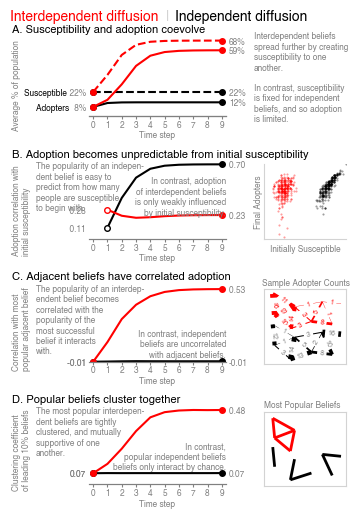

In [244]:
plt.rcParams.update({
    "figure.dpi": 100,
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 1.5,
    "lines.marker": "o",
    "lines.markersize": 4,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 8,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 8,
    "xtick.major.size": 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 8,
    
    "text.color": "grey",
    "text.usetex": False
})

figsize=(3.43, 5)
fig = plt.figure(figsize=figsize)

left = .23
right = .63
top = .95
bottom = .05

ylabel_size=6
#ytick_size=6
xtick_size=6
xlabel_size=6
xlabel_pad=1
subtitle_size=8
ytick_fontdict={'fontsize':6}

inset_x = .24
inset_y = .9*inset_x*figsize[0]/figsize[1]
inset_dy = .03  # vertical distance btw y1 title location and top of inset
x1, x2, x3 = .005, .005, .98-inset_x
y1, y2, y3, y4 = .97, .72, .475, .23  # heights of subtitles
textdx, textdy = .07, .025 # distance from the xlabels for comments

####### AAAA ##########
ax1 = plt.subplot(4, 1, 1)

means['NF diffusion'].plot(ax=ax1, color='k', markevery=9)
means['NF susceptibility'].plot(ax=ax1, color='k', linestyle='--', markevery=9)
means['inter adopters'].plot(ax=ax1, color='r', markevery=9)
means['inter susceptibles'].plot(ax=ax1, color='r', linestyle='--', markevery=9)

ax1.set_xlim(-.3, 9.3)
ylim = (0, 73)
ax1.set_ylim(*ylim)

# bottom
ax1.set_xlabel('Time step', fontsize=xlabel_size, labelpad=xlabel_pad)
ax1.set_xticks(range(0,10,1))
ax1.set_xticklabels(range(0,10,1), {"fontsize":xtick_size})


# left
ax1.set_yticks([means['NF susceptibility'].iloc[0], 
               means['NF diffusion'].iloc[0]])
ax1.set_yticklabels(
           [('%.0f%%' % means['NF susceptibility'].iloc[0]).rjust(7), 
            ('%.0f%%' % means['NF diffusion'].iloc[0]).rjust(8)], fontdict=ytick_fontdict)

# lefter left
ax1L = ax1.twinx()
ax1L.set_ylim(*ylim)
ax1L.yaxis.set_label_position('left')
ax1L.yaxis.set_ticks_position('left')
ax1L.tick_params(axis='y', labelcolor="k")
ax1L.set_yticks([means['NF susceptibility'].iloc[0], 
                 means['NF diffusion'].iloc[0]])
ax1L.set_yticklabels(['Susceptible        ', 
                        'Adopters       '], fontdict=ytick_fontdict)

# right
ax1R = ax1.twinx()
ax1R.set_ylim(*ylim)
ax1R.yaxis.set_label_position("right")
ax1R.set_yticks([means['NF susceptibility'].iloc[-1], 
                means['NF diffusion'].iloc[-1],
                means['inter susceptibles'].iloc[-1], 
                means['inter adopters'].iloc[-1]
               ])
ax1R.set_yticklabels([('%.0f%%' % means['NF susceptibility'].iloc[-1]).ljust(8), 
                      '%.0f%%' % means['NF diffusion'].iloc[-1],
                      '%.0f%%' % means['inter susceptibles'].iloc[-1], 
                      '%.0f%%' % means['inter adopters'].iloc[-1]
                     ], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y1-0.03, s='Average % of population', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x1, y=y1, s='A. Susceptibility and adoption coevolve', va='top', color='k', size=subtitle_size)
plt.figtext(x=x3-.03, y=y1-textdy+.01, va='top', size=6,
            s='Interdependent beliefs\n'\
              'spread further by creating\n'\
              'susceptibility to one\n'\
              'another.')
plt.figtext(x=x3-.03, y=y1-inset_y+.03, va='top', size=6, ha='left',
            s='In contrast, susceptibility\n'\
              'is fixed for independent\n'\
              'beliefs, and so adoption\n'\
              'is limited.')


######### BBBB ########
ax2 = plt.subplot(4, 1, 2)
means['match net initial suscep correlation'].plot(ax=ax2, color='k', markevery=(1,8))
means['inter net initial suscep correlation'].plot(ax=ax2, color='r', markevery=(1,8))


ax2.plot([1,1], 
         [means['match net initial suscep correlation'].loc[1], 
          means['inter net initial suscep correlation'].loc[1]], 
         color='white', markersize=2, zorder=20, linewidth=0)  # white center of first point in b

ax2.set_xlim(-.3, 9.3)
ylim = (0, .77)
ax2.set_ylim(*ylim)

# bottom
ax2.set_xlabel('Time step', fontsize=xlabel_size, labelpad=xlabel_pad)
ax2.set_xticks(range(0,10,1))
ax2.set_xticklabels(range(0,10,1), fontsize=xtick_size)

# left
ax2.set_yticks([means['inter net initial suscep correlation'].iloc[1], 
                means['match net initial suscep correlation'].iloc[1]])
ax2.set_yticklabels(
    [('%.02f' % means['inter net initial suscep correlation'].iloc[1]).rjust(8), 
     ('%.02f' % means['match net initial suscep correlation'].iloc[1]).rjust(8)], fontdict=ytick_fontdict
)

# right
ax2R = ax2.twinx()
ax2R.set_ylim(*ylim)
ax2R.yaxis.set_label_position("right")

ax2R.set_yticks([means['inter net initial suscep correlation'].iloc[-1], 
                means['match net initial suscep correlation'].iloc[-1]])
ax2R.set_yticklabels([('%.02f' % means['inter net initial suscep correlation'].iloc[-1]).ljust(8), 
                     ('%.02f' % means['match net initial suscep correlation'].iloc[-1]).ljust(8)], 
                     fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y2-0.03, s='Adoption correlation with\ninitial susceptibility', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x2, y=y2, s='B. Adoption becomes unpredictable from initial susceptibility', va='top', color='k', size=subtitle_size)
plt.figtext(x=x2+textdx, y=y2-textdy, va='top', size=6,
            s='The popularity of an indepen-\n'\
              'dent belief is easy to\n'\
              'predict from how many\n'\
              'people are susceptible\n'\
              'to begin with.')
plt.figtext(x=right, y=y2-textdy-.03, va='top', size=6, ha='right',
            s='In contrast, adoption\n'\
              'of interdependent beliefs\n'\
              'is only weakly influenced\n'\
              'by initial susceptibility.')


#### inset graph
ax2b = fig.add_axes([x3,y2-inset_dy-inset_y, inset_x, inset_y])
ax2b.plot(inter_sus[seed.index], inter_diff[seed.index], 'r.', markersize=1, alpha=.4)
ax2b.plot(indep_suscep[seed.index], indep_diff[seed.index], 'k.', markersize=1, alpha=.4)
plt.ylim(0, max(max(indep_diff), max(inter_diff)))
plt.xlim(0, max(max(inter_sus), max(indep_suscep)))
ax2b.spines['left'].set_visible(True)
ax2b.spines['left'].set_color('lightgrey')
ax2b.spines['bottom'].set_color('lightgrey')
ax2b.set_xticks([])
ax2b.set_yticks([])
ax2b.set_xlabel('Initially Susceptible', fontsize=6)
ax2b.set_ylabel('Final Adopters', fontsize=6, va='center')



# ######## CCCC ############
ax3 = plt.subplot(4, 1, 3)
ax3.plot(means.index, means['match best connected belief corr'], color='k', markevery=(0,9))
ax3.plot(means.index, means['inter best connected belief corr'], color='r', markevery=(0,9))

ax3.set_xlim(-.3, 9.3)
ylim = (0, .6)
ax3.set_ylim(*ylim)

# bottom
ax3.set_xlabel('Time step', fontsize=xlabel_size, labelpad=xlabel_pad)
ax3.set_xticks(range(0,10,1))
ax3.set_xticklabels(range(0,10,1), fontsize=xtick_size)


# left
ax3.set_yticks([means['inter best connected belief corr'].iloc[0], 
               means['match best connected belief corr'].iloc[0]])
ax3.set_yticklabels(
           [('%.02f' % means['inter best connected belief corr'].iloc[0]).rjust(7), 
            ('%.02f' % means['match best connected belief corr'].iloc[0]).rjust(8)], fontdict=ytick_fontdict)


# right
ax3R = ax3.twinx()
ax3R.set_ylim(*ylim)
ax3R.yaxis.set_label_position("right")
ax3R.set_yticks([means['inter best connected belief corr'].iloc[-1], 
                means['match best connected belief corr'].iloc[-1]])
ax3R.set_yticklabels([('%.02f' % means['inter best connected belief corr'].iloc[-1]).ljust(8), 
                      '%.02f' % means['match best connected belief corr'].iloc[-1]], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y3-.03, s='Correlation with most\npopular adjacent belief', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x1, y=y3, s='C. Adjacent beliefs have correlated adoption', va='top', color='k', size=subtitle_size)
plt.figtext(x=x1+textdx, y=y3-textdy, va='top', size=6,
            s='The popularity of an interdep-\n'\
              'endent belief becomes\n'\
              'correlated with the\n'\
              'popularity of the \n'\
              'most successful\n'\
              'belief it interacts\n'\
              'with.')
plt.figtext(x=right, y=y3-textdy-.09, va='top', size=6, ha='right',
            s='In contrast, independent\n'\
              'beliefs are uncorrelated\n'\
                'with adjacent beliefs.')


#### Inset ####
ax3b = fig.add_axes([x3, y3-inset_dy-inset_y-.005, inset_x, inset_y])
inter = {(0,1):16, (1,2):13, (2,3):3, (3,4):8, (4,5):1, 
         (0,2):11, (3,5):5, (2,6):14, (1,6):10, (5,2):1,(5,7):1, (3,6):3}
G = nx.from_edgelist(inter)
nx.set_edge_attributes(G, inter, name='weight')

pos = {
    0: [ 0.05337489, -1.        ],
    1: [-0.38712707, -0.80563193],
    2: [-0.03981886, -0.30618229],
    3: [-0.21645782,  0.26372263],
    4: [-0.09271407,  0.85974724],
    5: [0.31097159, 0.43462805],
    6: [-0.55557835, -0.27382355],
    7: [0.42734968, 0.96753985]
}
def rotate(x, rotation=0):
    length = sqrt(x[0]**2 + x[1]**2)
    angle = np.arctan2(x[0], x[1])
    new_angle = angle+rotation
    return [length*cos(new_angle), length*sin(new_angle)]
pos = {k: rotate(v, -.3) for k, v in pos.items()}

edges = G.edges()
weights = [G[u][v]['weight']/4 for u,v in edges]

nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=weights, node_size=0, with_labels=False, ax=ax3b)
nx.draw_networkx_edge_labels(G, pos, edge_labels=inter, font_size=5, alpha=1, font_color='r', ax=ax3b)

indep = {(0,1):12, (1,2):1, (2,3):5, (3,4):8, (4,5):10, 
         (0,2):1, (3,5):2, (2,6):14, (1,6):3, (2,5):3, (5,7):16, (3,6):13}
G2 = nx.from_edgelist(indep)
nx.set_edge_attributes(G2, indep, name='weight')

dx = 0
dy = -.7
pos2 = {k:[v[0]+dx, v[1]+dy] for k,v in pos.items()}

weights2 = [G2[u][v]['weight']/4 for u,v in G2.edges()]

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=weights2, node_size=0, with_labels=False, ax=ax3b)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=indep, font_size=5, alpha=.5, ax=ax3b);

plt.box('on')
ax3b.spines['left'].set_visible(True)
ax3b.spines['left'].set_color('lightgrey')
ax3b.spines['bottom'].set_color('lightgrey')
ax3b.spines['right'].set_visible(True)
ax3b.spines['right'].set_color('lightgrey')
ax3b.spines['top'].set_visible(True)
ax3b.spines['top'].set_color('lightgrey')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.25, 0.45)

plt.figtext(x=x3-.005, y=y3-inset_dy, s='Sample Adopter Counts', va='bottom', size=6)

###### DDDD #########
ax4 = plt.subplot(4, 1, 4)
ax4.plot(means.index, means['match top decile semantic clustering'], color='k', markevery=(0,9))
ax4.plot(means.index, means['inter top decile semantic clustering'], color='r', markevery=(0,9))


ax4.set_xlim(-.3, 9.3)
ylim = (0, .53)
ax4.set_ylim(*ylim)

# bottom
ax4.set_xlabel('Time step', fontsize=xlabel_size, labelpad=xlabel_pad)
ax4.set_xticks(range(0,10,1))
ax4.set_xticklabels(range(0,10,1), fontsize=xtick_size)

# left
ax4.set_yticks([means['inter top decile semantic clustering'].iloc[0], 
                means['match top decile semantic clustering'].iloc[0]])
ax4.set_yticklabels([('%.02f' % means['inter top decile semantic clustering'].iloc[0]), 
                     ('%.02f' % means['match top decile semantic clustering'].iloc[0])], fontdict=ytick_fontdict)


# right
ax4R = ax4.twinx()
ax4R.set_ylim(*ylim)
ax4R.yaxis.set_label_position("right")
ax4R.set_yticks([means['inter top decile semantic clustering'].iloc[-1], 
                means['match top decile semantic clustering'].iloc[-1]])
ax4R.set_yticklabels([('%.02f' % means['inter top decile semantic clustering'].iloc[-1]).ljust(8), 
                     '%.02f' % means['match top decile semantic clustering'].iloc[-1]], fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y4-.03, s='Clustering coefficient\nof leading 10% beliefs', rotation=90, va='top', fontsize=ylabel_size)
plt.figtext(x=x2, y=y4, s='D. Popular beliefs cluster together', va='top', color='k', size=subtitle_size)
plt.figtext(x=x2+textdx, y=y4-textdy, va='top', size=6,
            s='The most popular interdepen-\n'\
              'dent beliefs are tightly\n'\
              'clustered, and mutually\n'\
              'supportive of one\n'\
              'another.')
plt.figtext(x=right, y=y4-textdy-.07, va='top', ha='right', size=6,
            s='In contrast,\n'\
               'popular independent beliefs\n'\
           'beliefs only interact by chance.')


#### Inset ####
ax4b = fig.add_axes([x3, y4-inset_dy-inset_y-.005, inset_x, inset_y])

nx.draw_networkx(G, pos, edgelist=edges, edge_color='r', width=[2 if v>2 else 0 for v in weights], 
                 node_size=0, with_labels=False, ax=ax4b)

nx.draw_networkx(G2, pos2, edgelist=edges, edge_color='k', width=[2 if v>2 else 0 for v in weights2], 
                 node_size=0, with_labels=False, ax=ax4b)
plt.box('on')
ax4b.spines['left'].set_visible(True)
ax4b.spines['left'].set_color('lightgrey')
ax4b.spines['bottom'].set_color('lightgrey')
ax4b.spines['right'].set_visible(True)
ax4b.spines['right'].set_color('lightgrey')
ax4b.spines['top'].set_visible(True)
ax4b.spines['top'].set_color('lightgrey')
plt.figtext(x=x3, y=y4-inset_dy, s='Most Popular Beliefs', va='bottom', size=6)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.3, .5)



#### Figure Title text ###
# plt.suptitle('The Effect of Reciprocal Facilitation on Emergent Belief Structures', 
#              x=0, y=1, ha='left', va='top', fontsize=13, color='k')
plt.figtext(x=.48, y=1, s='Independent diffusion',  ha='left', va='top', fontsize=10, color='k')
plt.figtext(x=.455, y=1, s='|',  ha='left', va='top', fontsize=10, color='lightgrey')
plt.figtext(x=0, y=1, s='Interdependent diffusion', va='top', ha='left', fontsize=10, color='r')

plt.subplots_adjust(left=left, right=right, top=top, bottom=bottom, wspace=.6, hspace=.5)

plt.savefig('Fig2_emergent_belief_structures.png', transparent=False, dpi=300)


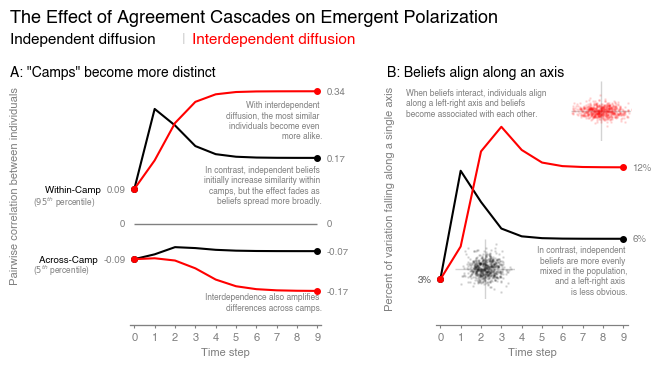

In [104]:
figsize=(6.5, 3.5)
fig = plt.figure(figsize=figsize)
# sociological science:
# 8 pt font in tables
# 10 pt font in text
# 1 inch margins

x1, x2 = 0, .58
y1 = .84
textdx, textdy = .03, .08

ytick_fontdict={'fontsize':7}

####### left ##########
ax1 = plt.subplot(1, 2, 1)

means['match correlation similarity 95%'].plot(ax=ax1, color='k', markevery=9)
means['match correlation similarity 5%'].plot(ax=ax1, linestyle='-', color='k', markevery=9)
means['inter correlation similarity 95%'].plot(ax=ax1, color='r', markevery=9)
means['inter correlation similarity 5%'].plot(ax=ax1, linestyle='-', color='r', markevery=9)

plt.hlines(0, 0, 9, linewidth=1, color='grey')

ax1.set_xlim(-.2, 9.2)
ylim = (-.26, .36)
ax1.set_ylim(*ylim)

# bottom
ax1.set_xlabel('Time step')
ax1.set_xticks(range(0,10,1))
ax1.set_xticklabels(range(0,10,1))

ax1.set_yticks([means['inter correlation similarity 95%'].iloc[0],
                0,
                means['inter correlation similarity 5%'].iloc[0]])
ax1.set_yticklabels([('%.02f' % means['inter correlation similarity 95%'].iloc[0]),
                     0,
                     ('%.02f' % means['inter correlation similarity 5%'].iloc[0])]
                    , fontdict=ytick_fontdict)



# lefter left
ax1L = ax1.twinx()
ax1L.set_ylim(*ylim)
ax1L.yaxis.set_label_position('left')
ax1L.yaxis.set_ticks_position('left')
ax1L.tick_params(axis='y', labelcolor="k")
ax1L.set_yticks([means['inter correlation similarity 95%'].iloc[0],
                means['inter correlation similarity 5%'].iloc[0]])
# ax1L.set_yticklabels(['$95^{th}$ percentile         ', 
#                      '$5^{th}$ percentile          '], fontdict=ytick_fontdict)
ax1L.set_yticklabels(['Within-Camp         ', 
                     'Across-Camp          '], fontdict=ytick_fontdict)


# right
ax1R = ax1.twinx()
ax1R.set_ylim(*ylim)
ax1R.yaxis.set_label_position("right")
ax1R.set_yticks([means['inter correlation similarity 95%'].iloc[-1], 
                means['match correlation similarity 95%'].iloc[-1],
                0,
                means['match correlation similarity 5%'].iloc[-1],
                means['inter correlation similarity 5%'].iloc[-1],
               ])
ax1R.set_yticklabels([('%.02f' % means['inter correlation similarity 95%'].iloc[-1]), 
                     ('%.02f' % means['match correlation similarity 95%'].iloc[-1]),
                     0,
                     ('%.02f' % means['match correlation similarity 5%'].iloc[-1]), 
                     ('%.02f' % means['inter correlation similarity 5%'].iloc[-1]), 
                    ], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y1, va='top', color='k', size=10,
            s='A: "Camps" become more distinct')
plt.figtext(x=x1, y=y1-.06, rotation=90, va='top',
            s='Pairwise correlation between individuals')

plt.figtext(x=.48, y=.74, va='top', ha='right', size=6,
            s='With interdependent \ndiffusion, the most similar \nindividuals become even \nmore alike.')
plt.figtext(x=.48, y=.555, va='top', ha='right', size=6, 
            s='In contrast, independent beliefs \ninitially increase similarity within \ncamps, but the effect fades as \nbeliefs spread more broadly.')
plt.figtext(x=.48, y=.19, va='top', ha='right', size=6, 
            s='Interdependence also amplifies \ndifferences across camps.')

plt.figtext(x=x1+textdx+.005, y=.47, va='top', ha='left', size=6, 
            s="($95^{th}$ percentile)")
plt.figtext(x=x1+textdx+.005, y=.275, va='top', ha='left', size=6, 
            s="($5^{th}$ percentile)")


######### Right #########
ax2 = plt.subplot(1, 2, 2)

means['match percent explained variance'].plot(ax=ax2, color='k', markevery=9)
means['inter percent explained variance'].plot(ax=ax2, color='r', markevery=9)

ax2.set_xlim(-.2, 9.2)
ylim = (0, 18)
ax2.set_ylim(*ylim)

# bottom
ax2.set_xlabel('Time step')
ax2.set_xticks(range(0,10,1))
ax2.set_xticklabels(range(0,10,1))

# left
ax2.set_yticks([#2.5,
                means['inter percent explained variance'].iloc[0], 
                means['match percent explained variance'].iloc[0]])
ax2.set_yticklabels([#'2.5%',
                     ('%.0f%%' % means['inter percent explained variance'].iloc[0]), 
                     ('%.0f%%' % means['match percent explained variance'].iloc[0])], fontdict=ytick_fontdict)

# right
ax2R = ax2.twinx()
ax2R.set_ylim(*ylim)
ax2R.yaxis.set_label_position("right")

ax2R.set_yticks([#2.5, 
                 means['inter percent explained variance'].iloc[-1], 
                 means['match percent explained variance'].iloc[-1]])
ax2R.set_yticklabels([#'2.5%',
                      ('%.0f%%' % means['inter percent explained variance'].iloc[-1]), 
                     ('%.0f%%' % means['match percent explained variance'].iloc[-1])], 
                     fontdict=ytick_fontdict)

plt.figtext(x=x2, y=y1, va='top', color='k', size=10, 
            s='B: Beliefs align along an axis')
plt.figtext(x=x2-.003, y=y1-.06, rotation=90, va='top', 
            s='Percent of variation falling along a single axis')

plt.figtext(x=x2+textdx, y=y1-textdy+.015, va='top', ha='left', size=6, 
            s='When beliefs interact, individuals align\nalong a left-right axis and beliefs\nbecome associated with each other.')
plt.figtext(x=.95, y=.325, va='top', ha='right', size=6, 
            s='In contrast, independent \nbeliefs are more evenly \nmixed in the population,\nand a left-right axis \nis less obvious.')


###### Inset ####
n_pts = 600

insize = .6
ax3a = fig.add_axes([x2+.105, .175, 
                     insize/figsize[0], insize/figsize[1]])


dmeans = [0, 0]  
dstds = [.3, .25]
dcorr = .001         # correlation
dcovs = [[dstds[0]**2          , dstds[0]*dstds[1]*dcorr], 
        [dstds[0]*dstds[1]*dcorr,           dstds[1]**2]] 

xs, ys = np.random.multivariate_normal(dmeans, dcovs, n_pts).T
ax3a.plot(xs, ys, '.', markersize=2, color='k', alpha=.1)

ax3a.set_xticks([])
ax3a.set_yticks([])
ax3a.spines['bottom'].set_visible(False)
plt.vlines(0, -1, 1, colors='lightgrey', linewidth=1)
plt.hlines(0, -1, 1, colors='lightgrey', linewidth=1)
ax3a.set_xlim(-1,1)
ax3a.set_ylim(-1,1)



ax3b = fig.add_axes([.95-insize/figsize[0]+.005, .625, 
                     insize/figsize[0], insize/figsize[1]])

dstds = [.4, .15]
dcorr = .001         # correlation
dcovs = [[dstds[0]**2          , dstds[0]*dstds[1]*dcorr], 
        [dstds[0]*dstds[1]*dcorr,           dstds[1]**2]] 

xs, ys = np.random.multivariate_normal(dmeans, dcovs, n_pts).T
ax3b.plot(xs, ys, '.', markersize=2, color='r', alpha=.1)


ax3b.set_xticks([])
ax3b.set_yticks([])
ax3b.spines['bottom'].set_visible(False)
plt.vlines(0, -1, 1, colors='lightgrey', linewidth=1)
plt.hlines(0, -1, 1, colors='lightgrey', linewidth=1)
ax3b.set_xlim(-1,1)
ax3b.set_ylim(-1,1)




######### Figure Text ##########


plt.suptitle('The Effect of Agreement Cascades on Emergent Polarization', 
             x=0, y=1, ha='left', va='top', fontsize=13, color='k')
plt.figtext(x=0, y=.935, s='Independent diffusion',  ha='left', va='top', fontsize=11, color='k')
plt.figtext(x=.265, y=.935, s='|',  ha='left', va='top', fontsize=11, color='lightgrey')
plt.figtext(x=.28, y=.935, s='Interdependent diffusion', va='top', ha='left', fontsize=11, color='r')

plt.subplots_adjust(left=.185, right=.95, top=.79, bottom=.12, wspace=.6)

plt.savefig('Fig3_emergent_polarization', transparent=False, dpi=150)

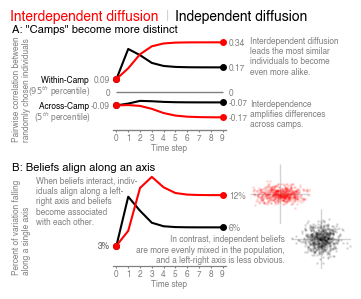

In [243]:
plt.rcParams.update({
    "figure.dpi": 100,
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 1.5,
    "lines.marker": "o",
    "lines.markersize": 4,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 6,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 6,
    "xtick.major.size": 1.5,
    'xtick.major.pad': 1,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 5,
    'ytick.major.pad': 2,
    
    "text.color": "grey",
    "text.usetex": False
})

left = .3
right = .63
top = .89
bottom = .08

figsize=(3.43, 2.8)
fig = plt.figure(figsize=figsize)

x1, x2 = 0.005, .58
y1, y2 = .94, .45
textdx, textdy = .07, .05

ytick_fontdict={'fontsize':6}

####### AAAA ##########
ax1 = plt.subplot(2, 1, 1)

means['match correlation similarity 95%'].plot(ax=ax1, color='k', markevery=9)
means['match correlation similarity 5%'].plot(ax=ax1, linestyle='-', color='k', markevery=9)
means['inter correlation similarity 95%'].plot(ax=ax1, color='r', markevery=9)
means['inter correlation similarity 5%'].plot(ax=ax1, linestyle='-', color='r', markevery=9)

plt.hlines(0, 0, 9, linewidth=1, color='grey')

ax1.set_xlim(-.3, 9.3)
ylim = (-.26, .36)
ax1.set_ylim(*ylim)

# bottom
ax1.set_xlabel('Time step', fontsize=6, labelpad=1)
ax1.set_xticks(range(0,10,1))
ax1.set_xticklabels(range(0,10,1))


ax1.set_yticks([means['inter correlation similarity 95%'].iloc[0],
                0,
                means['inter correlation similarity 5%'].iloc[0]])
ax1.set_yticklabels([('%.02f' % means['inter correlation similarity 95%'].iloc[0]),
                     0,
                     ('%.02f' % means['inter correlation similarity 5%'].iloc[0])]
                    , fontdict=ytick_fontdict)



# lefter left
ax1L = ax1.twinx()
ax1L.set_ylim(*ylim)
ax1L.yaxis.set_label_position('left')
ax1L.yaxis.set_ticks_position('left')
ax1L.tick_params(axis='y', labelcolor="k")
ax1L.set_yticks([means['inter correlation similarity 95%'].iloc[0],
                means['inter correlation similarity 5%'].iloc[0]])
# ax1L.set_yticklabels(['$95^{th}$ percentile         ', 
#                      '$5^{th}$ percentile          '], fontdict=ytick_fontdict)
ax1L.set_yticklabels(['Within-Camp         ', 
                      'Across-Camp         '], fontdict=ytick_fontdict)


# right
ax1R = ax1.twinx()
ax1R.set_ylim(*ylim)
ax1R.yaxis.set_label_position("right")
ax1R.set_yticks([means['inter correlation similarity 95%'].iloc[-1], 
                means['match correlation similarity 95%'].iloc[-1],
                0,
                means['match correlation similarity 5%'].iloc[-1],
                means['inter correlation similarity 5%'].iloc[-1],
               ])
ax1R.set_yticklabels([('%.02f' % means['inter correlation similarity 95%'].iloc[-1]), 
                     ('%.02f' % means['match correlation similarity 95%'].iloc[-1]),
                     0,
                     ('%.02f' % means['match correlation similarity 5%'].iloc[-1]), 
                     ('%.02f' % means['inter correlation similarity 5%'].iloc[-1]), 
                    ], fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y1, va='top', color='k', fontsize=8,
            s='A: "Camps" become more distinct')
plt.figtext(x=x1, y=y1-.04, rotation=90, va='top', fontsize=6,
            s='Pairwise correlation between\nrandomly chosen individuals')

plt.figtext(x=right+textdx, y=y1-.04, va='top', ha='left', size=6,
            s='Interdependent diffusion\nleads the most similar\nindividuals to become\neven more alike.')
# plt.figtext(x=right+textdx, y=y1-.15, va='top', ha='left', size=6, 
#             s='In contrast, independen\nbeliefs initially increase\nsimilarity within camps,\nbut the effect fades as  beliefs spread more broadly.')
plt.figtext(x=right+textdx, y=y1-.265, va='top', ha='left', size=6, 
            s='Interdependence\namplifies differences\nacross camps.')

plt.figtext(x=left-.065, y=.73, va='top', ha='right', size=6, 
            s="($95^{th}$ percentile)")
plt.figtext(x=left-.065, y=.635, va='top', ha='right', size=6, 
            s="($5^{th}$ percentile)")


######### BBBB #########
ax2 = plt.subplot(2, 1, 2)

means['match percent explained variance'].plot(ax=ax2, color='k', markevery=9)
means['inter percent explained variance'].plot(ax=ax2, color='r', markevery=9)

ax2.set_xlim(-.3, 9.3)
ylim = (0, 15)
ax2.set_ylim(*ylim)

# bottom
ax2.set_xlabel('Time step', fontsize=6, labelpad=1)
ax2.set_xticks(range(0,10,1))
ax2.set_xticklabels(range(0,10,1))

# left
ax2.set_yticks([#2.5,
                means['inter percent explained variance'].iloc[0], 
                means['match percent explained variance'].iloc[0]])
ax2.set_yticklabels([#'2.5%',
                     ('%.0f%%' % means['inter percent explained variance'].iloc[0]), 
                     ('%.0f%%' % means['match percent explained variance'].iloc[0])], fontdict=ytick_fontdict)

# right
ax2R = ax2.twinx()
ax2R.set_ylim(*ylim)
ax2R.yaxis.set_label_position("right")

ax2R.set_yticks([#2.5, 
                 means['inter percent explained variance'].iloc[-1], 
                 means['match percent explained variance'].iloc[-1]])
ax2R.set_yticklabels([#'2.5%',
                      ('%.0f%%' % means['inter percent explained variance'].iloc[-1]), 
                     ('%.0f%%' % means['match percent explained variance'].iloc[-1])], 
                     fontdict=ytick_fontdict)

plt.figtext(x=x1, y=y2, va='top', color='k', fontsize=8, 
            s='B: Beliefs align along an axis')
plt.figtext(x=x1, y=y2-.06, rotation=90, va='top', 
            s='Percent of variation falling\nalong a single axis', fontsize=6)

plt.figtext(x=x1+textdx, y=y2-textdy, va='top', ha='left', fontsize=6, 
            s='When beliefs interact, indiv-\niduals align along a left-\nright axis and beliefs\nbecome associated\nwith each other.')
plt.figtext(x=1-insize/figsize[0]-.025, y=.19, va='top', ha='right', fontsize=6, 
            s='In contrast, independent beliefs\nare more evenly mixed in the population,\nand a left-right axis is less obvious.')


###### Inset ####
n_pts = 600

insize = .6
ax3a = fig.add_axes([1-insize/figsize[0]-.005, .07, 
                     insize/figsize[0], insize/figsize[1]])


dmeans = [0, 0]  
dstds = [.3, .25]
dcorr = .001         # correlation
dcovs = [[dstds[0]**2          , dstds[0]*dstds[1]*dcorr], 
        [dstds[0]*dstds[1]*dcorr,           dstds[1]**2]] 

xs, ys = np.random.multivariate_normal(dmeans, dcovs, n_pts).T
ax3a.plot(xs, ys, '.', markersize=2, color='k', alpha=.1)

ax3a.set_xticks([])
ax3a.set_yticks([])
ax3a.spines['bottom'].set_visible(False)
plt.vlines(0, -1, 1, colors='lightgrey', linewidth=1)
plt.hlines(0, -1, 1, colors='lightgrey', linewidth=1)
ax3a.set_xlim(-1,1)
ax3a.set_ylim(-1,1)



ax3b = fig.add_axes([right+.07, .23, 
                     insize/figsize[0], insize/figsize[1]])

dstds = [.4, .15]
dcorr = .001         # correlation
dcovs = [[dstds[0]**2          , dstds[0]*dstds[1]*dcorr], 
        [dstds[0]*dstds[1]*dcorr,           dstds[1]**2]] 

xs, ys = np.random.multivariate_normal(dmeans, dcovs, n_pts).T
ax3b.plot(xs, ys, '.', markersize=2, color='r', alpha=.1)


ax3b.set_xticks([])
ax3b.set_yticks([])
ax3b.spines['bottom'].set_visible(False)
plt.vlines(0, -1, 1, colors='lightgrey', linewidth=1)
plt.hlines(0, -1, 1, colors='lightgrey', linewidth=1)
ax3b.set_xlim(-1,1)
ax3b.set_ylim(-1,1)




######### Figure Text ##########


# plt.suptitle('The Effect of Agreement Cascades on Emergent Polarization', 
#              x=0, y=1, ha='left', va='top', fontsize=13, color='k')
plt.figtext(x=.48, y=.995, s='Independent diffusion',  ha='left', va='top', fontsize=10, color='k')
plt.figtext(x=.455, y=.995, s='|',  ha='left', va='top', fontsize=10, color='lightgrey')
plt.figtext(x=0, y=.995, s='Interdependent diffusion', va='top', ha='left', fontsize=10, color='r')

plt.subplots_adjust(left=left, right=right, top=top, bottom=bottom, hspace=.5)

plt.savefig('Fig3_emergent_polarization.png', transparent=False, dpi=150)